this is a note for learn PUBG Data Exploration, PUBG cheat Finder
Source data from https://www.kaggle.com/c/pubg-finish-placement-prediction/data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 



In [7]:
%matplotlib inline

In [8]:
pwd

'C:\\Users\\DHIKANIME\\Downloads\\Refactored_Py_DS_ML_Bootcamp-master\\lab'

In [9]:
df = pd.read_csv("train_V2.csv")
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## Description

Data fields
* **DBNOs** - Number of enemy players knocked.
* **assists** - Number of enemy players this player damaged that were killed by teammates.
* **boosts** - Number of boost items used.
* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
* **headshotKills** - Number of enemy players killed with headshots.
* **heals** - Number of healing items used.
* **Id** - Player’s Id
* **killPlace** - Ranking in match of number of enemy players killed.
* **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **kills** - Number of enemy players killed.
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration** - Duration of match in seconds.
* **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
* **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistance** - Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* **numGroups** - Number of groups we have data for in the match.
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match. """

## Data Preparation

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [12]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [13]:
#data shpae (y, x)
print('data shape: ', df.shape)

data shape:  (4446966, 29)


In [14]:
#finding illegal match that have NaN
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [15]:
#finding player join in every single match id.
df.groupby('matchId')['matchId'].transform('count')

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: matchId, Length: 4446966, dtype: int64

In [17]:
#checking how many player join in match id : a10357fd1a4a91 was  join
pjoin = df[df['matchId']=="a10357fd1a4a91"]['matchId'].count()
print("PlayerID : a10357fd1a4a91 have join {} times".format(pjoin))

PlayerID : a10357fd1a4a91 have join 96 times


In [18]:
#count how many player join in match
# understand groupby and transform https://pbpython.com/pandas_transform.html
df.groupby('matchId')['matchId'].transform('count')

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: matchId, Length: 4446966, dtype: int64

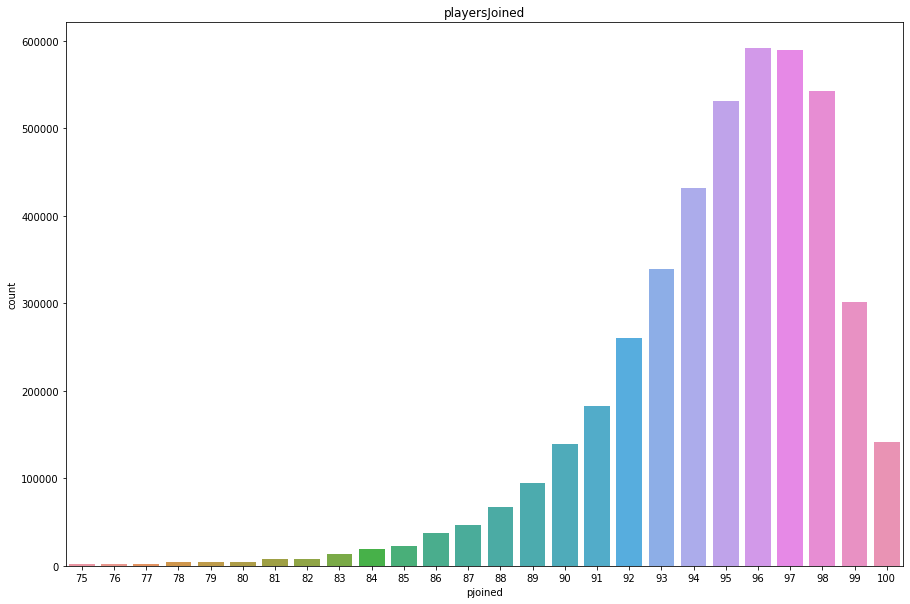

In [20]:
#how many people are in a match
#make new variable name df['pjoined']
df['pjoined'] = df.groupby('matchId')['matchId'].transform('count')
#make it plot
plt.figure(figsize=(15,10))
sns.countplot(df[df['pjoined']>=75]['pjoined'])
plt.title('playersJoined')
plt.show()

**make Normalized features.**

Now that we have a feature 'playersJoined' we can normalize other features based on the amount of players. 
Features that can be valuable to normalize are: 

* kills 
* damageDealt
* maxPlace
* matchDuration







In [15]:
#First Data before normalize
df['kills']

0          0
1          0
2          0
3          0
4          1
          ..
4446961    0
4446962    0
4446963    0
4446964    2
4446965    2
Name: kills, Length: 4446966, dtype: int64

In [20]:
#After Normalize
df['killsNorm'] = df['kills']*((100-df['pjoined'])/100 + 1)
df['killsNorm']


0          0.00
1          0.00
2          0.00
3          0.00
4          1.03
           ... 
4446961    0.00
4446962    0.00
4446963    0.00
4446964    2.12
4446965    2.04
Name: killsNorm, Length: 4446966, dtype: float64

In [18]:
#normalize kills, damageDealt,maxPlace,matchDuration and make it new variable
df['killsNorm'] = df['kills']*((100-df['pjoined'])/100 + 1)
df['damageDealtNorm'] = df['damageDealt']*((100-df['pjoined'])/100 + 1)
df['maxPlaceNorm'] = df['maxPlace']*((100-df['pjoined'])/100 + 1)
df['matchDurationNorm'] = df['matchDuration']*((100-df['pjoined'])/100 + 1)

# Compare standard features and normalized features
#make new dataframe
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
#showing data 0-10
df[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


## Show it Begin


In [21]:
# Create new feature healsandboosts
df['healsandboosts'] = df['heals'] + df['boosts']
df[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


**1. Killing without moving**

In [22]:
# Create feature totalDistance
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
# Create feature killsWithoutMoving
df['killsWithoutMoving'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))

In [23]:
# Check players who kills without moving
display(df[df['killsWithoutMoving'] == True].shape)
df[df['killsWithoutMoving'] == True].head(10)

(1535, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,pjoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0,0.8571,58,8.52,842.0600,21.30,842.06,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0,0.6000,42,4.74,547.6280,17.38,2834.52,6,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0,0.8947,21,35.80,3132.5000,35.80,1607.42,5,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,1500,0.0000,73,1.27,200.4060,24.13,1014.73,0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0,0.3000,42,1.58,158.0000,17.38,2834.52,0,0.0,True
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0,0.8000,44,9.36,789.5160,9.36,909.48,3,0.0,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0,0.6000,48,18.24,1708.4800,9.12,836.00,1,0.0,True
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0,0.8571,57,10.01,757.7570,21.45,856.57,11,0.0,True
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,1500,0.2857,61,2.78,179.1710,11.12,1017.48,7,0.0,True
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0,0.8571,53,1.47,125.7732,22.05,1051.05,0,0.0,True


**Anomalies in roadKills**

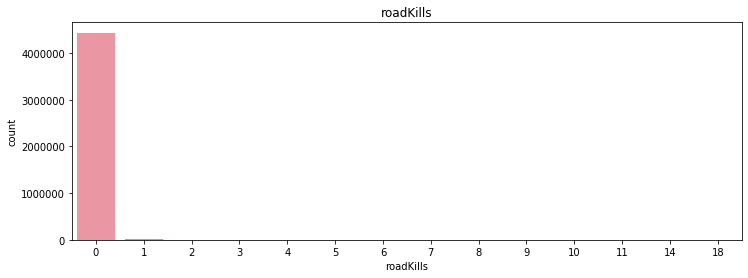

In [31]:

plt.figure(figsize=(12,4))
sns.countplot(data=df, x=df['roadKills']).set_title('roadKills')
plt.show()

In [26]:
# Players who got more than 10 roadKills
df[df['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,pjoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False


could you see player c3e444f7d1289f drove 5 meters but killed 14 people with it. insane!

**Anomalies in aim (More than 45 kills)**

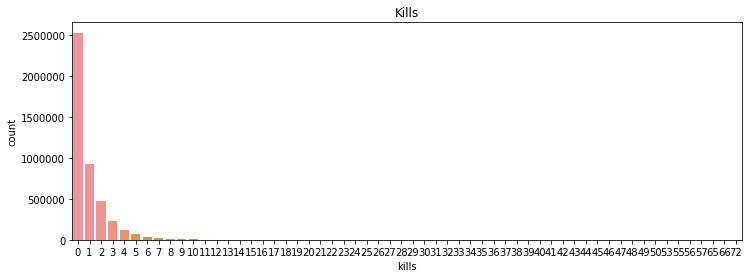

In [29]:
# Let's plot the total kills for every player first. It doesn't look like there are too many outliers.
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=df, x=df['kills']).set_title('Kills')
plt.show()

In [30]:
# Players who got more than 30 kills
display(df[df['kills'] > 30].shape)
df[df['kills'] > 30].head(10)

(102, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,pjoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,1.0000,11,122.85,12504.24,20.79,3398.22,5,1036.00,False
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,0,1.0000,13,72.93,7169.58,24.31,3356.65,5,124.20,False
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,0,1.0000,38,53.46,4709.34,8.10,1339.74,2,382.40,False
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1500,1.0000,20,59.40,5499.00,32.40,1605.60,0,35.30,False
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,1500,0.2308,54,49.64,5042.84,20.44,1749.08,4,111.10,False


**Anomalies in aim part 2 (100% headshot rate)**

In [35]:
# Create headshot_rate feature
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)
df['headshot_rate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4446966, dtype: float64

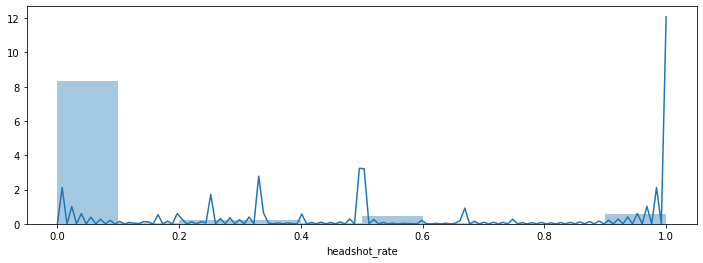

In [36]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,4))
sns.distplot(df['headshot_rate'], bins=10)
plt.show()

In [39]:
# Players who made a minimum of 10 kills and have a headshot_rate of 100% (1.0)
display(df[(df['headshot_rate'] == 1) & (df['kills'] > 9)].shape)
df[(df['headshot_rate'] == 1) & (df['kills'] > 9)].head(10)

(24, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,pjoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,1.0000,95,11.55,1278.90,29.40,1912.05,8,8178.0,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,1.0000,97,10.30,1096.95,27.81,1283.38,5,2858.9,False,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,1.0000,93,12.84,1411.33,29.96,1851.10,6,5963.0,False,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,1.0000,88,12.32,1288.00,51.52,1397.76,5,3108.0,False,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,1.0000,96,13.52,1537.12,50.96,1434.16,12,2479.8,False,1.0


**Anomalies in aim part 3 (Longest kill)**

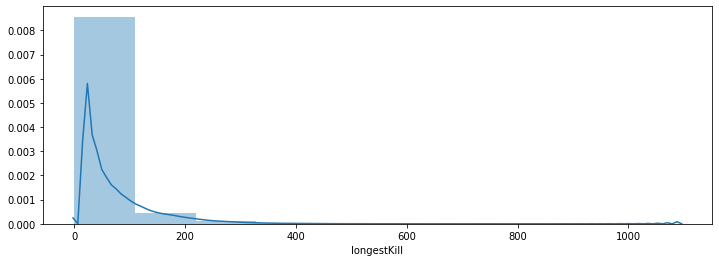

In [40]:
# Plot the distribution of longestKill
plt.figure(figsize=(12,4))
sns.distplot(df['longestKill'], bins=10)
plt.show()

In [41]:
# Check out players who made kills with a distance of more than 1 km
display(df[df['longestKill'] >= 1000].shape)
df[df['longestKill'] >= 1000].head(10)

(23, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,pjoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.9231,88,4.48,877.968,30.24,2087.68,4,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.5385,29,18.81,2195.640,23.94,2236.68,7,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1.0000,51,14.90,1531.720,19.37,1040.02,0,2981.00,False,0.000000
523088,1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,...,0.7143,60,1.40,211.680,11.20,1673.00,0,0.00,True,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.6000,41,25.44,2241.900,9.54,1734.69,0,29.21,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.0000,61,1.39,273.552,11.12,654.69,0,3159.00,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.9091,86,11.40,1153.680,13.68,1163.94,0,569.50,False,0.500000
996713,f4082eee4c45e9,4d02ce950f74fc,838cb9a3c94598,1,0,916.4,0,0,0,17,...,1.0000,60,14.00,1282.960,11.20,1673.00,0,0.00,True,0.000000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.2857,58,4.26,467.606,11.36,825.02,3,832.50,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.9412,52,22.20,2427.200,76.96,1827.80,6,2848.00,False,0.466667


**Anomalies in travelling (rideDistance, walkDistance and swimDistance)**

In [42]:
# Summary statistics for the Distance features
df[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06
mean,1.154218e+03,6.061157e+02,4.509322e+00,1.764843e+03
std,1.183497e+03,1.498344e+03,3.050220e+01,2.183117e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.551000e+02,0.000000e+00,0.000000e+00,1.581000e+02
50%,6.856000e+02,0.000000e+00,0.000000e+00,7.882000e+02
75%,1.976000e+03,1.909750e-01,0.000000e+00,2.728447e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


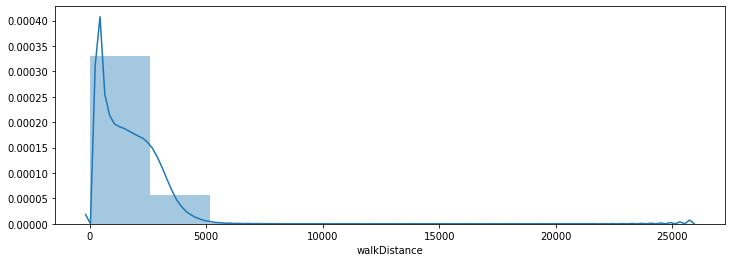

In [5]:
# Plot the distribution of walkDistance
plt.figure(figsize=(12,4))
sns.distplot(df['walkDistance'], bins=10)
plt.show()

In [8]:
# walkDistance anomalies
display(df[df['walkDistance'] >= 10000].shape)
df[df['walkDistance'] >= 10000].head(10)

(219, 29)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0,0.4212,0,9.882,0,0,13530.0,7,0,0.8163
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0,0.0373,0,40.870,0,0,10030.0,7,1533,0.9474
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0,0.0088,0,36.750,0,0,12410.0,3,0,0.9130
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0,847.8000,0,45.820,0,0,11590.0,3,1563,0.8333
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0,1005.0000,0,45.630,0,0,10440.0,6,1488,0.8194
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.73,0,0,7,47,...,0,0.0378,0,38.760,0,0,12790.0,5,1500,0.7340
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,0,1823.0000,0,30.810,0,0,10370.0,3,0,0.6957
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3,0.00,0,0,0,41,...,0,4581.0000,0,197.200,0,0,10140.0,5,1772,0.9333
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3,0.00,0,0,13,46,...,0,2400.0000,0,16.700,0,0,10220.0,4,0,0.8602
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4,52.16,0,0,7,25,...,1,0.0314,0,29.830,0,0,10860.0,6,0,0.8936


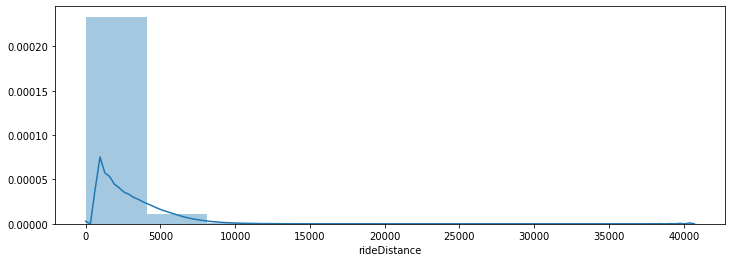

In [9]:
# Plot the distribution of rideDistance
plt.figure(figsize=(12,4))
sns.distplot(df['rideDistance'], bins=10)
plt.show()

In [10]:
# rideDistance anomalies
display(df[df['rideDistance'] >= 20000].shape)
df[df['rideDistance'] >= 20000].head(10)

(150, 29)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.20,0,0,1,30,...,0,25930.0,0,0.0,0,0,376.60,6,0,0.6421
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.00,0,0,0,55,...,0,21880.0,0,0.0,0,0,185.40,0,0,0.5376
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.00,0,0,0,26,...,0,28450.0,1,0.0,0,0,467.50,3,0,0.8878
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.00,0,0,0,46,...,0,20510.0,0,0.0,1,0,687.20,9,0,0.7917
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.20,0,1,2,2,...,0,25810.0,2,0.0,0,0,923.20,6,0,0.9785
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.55,0,0,0,53,...,0,21230.0,0,0.0,0,0,63.23,0,1514,0.5000
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.00,0,0,1,47,...,1,28970.0,0,0.0,0,0,297.30,3,0,0.7447
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.92,1,0,0,45,...,0,21700.0,0,0.0,0,0,242.10,4,0,0.6875
403647,c65da7b3fceef5,814d1b3736e276,ff9f570b555d48,0,2,0.00,0,0,3,54,...,0,20600.0,0,0.0,0,0,598.20,1,0,0.6739
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.00,0,0,2,43,...,0,31960.0,0,0.0,0,0,402.10,3,1449,0.8171


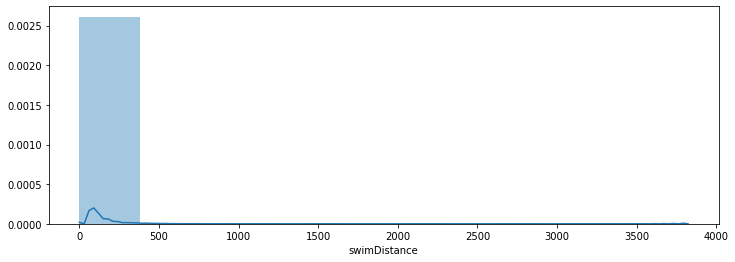

In [11]:
# Plot the distribution of swimDistance
plt.figure(figsize=(12,4))
sns.distplot(df['swimDistance'], bins=10)
plt.show()

In [13]:
# Players who swam more than 2 km
df[df['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,0,0.0,0,2295.0,0,0,1002.000,4,1466,0.9592
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,0,5689.0,0,2148.0,0,0,2276.000,5,0,0.9600
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,0,3331.0,0,2718.0,0,0,4691.000,5,1516,1.0000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,0,0.0,0,2668.0,0,0,415.100,10,1499,1.0000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,0,0.0,0,3823.0,0,0,995.300,9,0,1.0000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,0,864.0,0,2484.0,0,0,1966.000,3,0,0.5833
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,1,2089.0,0,3514.0,0,0,4296.000,8,1492,0.8511
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,0,0.0,0,2387.0,0,0,7.546,6,0,1.0000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,1,3033.0,0,2206.0,0,0,4687.000,4,0,0.9600
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,0,0.0,0,2338.0,0,0,1750.000,0,1518,0.2143


**Anomalies in supplies (weaponsAcquired)**

Most people acquire between 0 and 10 weapons in a game, but you also see some people acquire more than 80 weapons! Let's check these guys out.

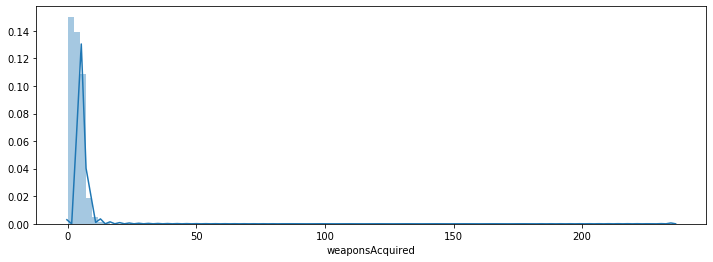

In [14]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(12,4))
sns.distplot(df['weaponsAcquired'], bins=100)
plt.show()

In [15]:
# Players who acquired more than 80 weapons
display(df[df['weaponsAcquired'] >= 80].shape)
df[df['weaponsAcquired'] >= 80].head()

(21, 29)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0,1880.0,0,0.00,0,0,1307.0,128,1577,0.7111
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0,0.0,0,0.00,0,0,1687.0,80,0,0.7500
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0,2852.0,0,47.21,0,0,2400.0,102,0,0.8929
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0,0.0,0,0.00,0,0,653.1,95,0,0.5600
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.00,0,8,4,3,...,0,954.4,0,0.00,0,0,1128.0,83,0,0.8000


**Anomalies in supplies part 2 (heals)**

Most players us 5 healing items or less. We can again recognize some weird anomalies

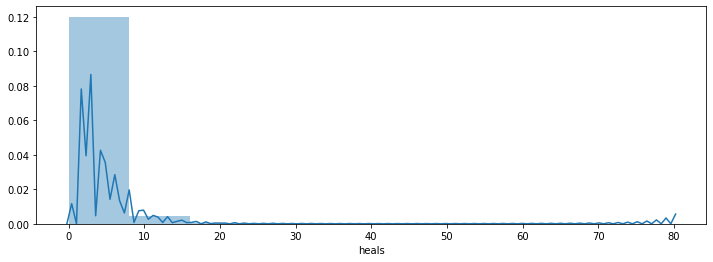

In [16]:
# Distribution of heals
plt.figure(figsize=(12,4))
sns.distplot(df['heals'], bins=10)
plt.show()

In [17]:
# 40 or more healing items used
display(df[df['heals'] >= 40].shape)
df[df['heals'] >= 40].head(10)

(135, 29)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0,5467.0,0,0.000,0,0,1387.0,6,0,0.9368
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,0,0.0,0,292.400,0,0,2791.0,7,0,0.9615
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,0,0.0,0,3.443,0,0,1340.0,3,1543,0.8333
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0,5934.0,0,0.000,0,0,1510.0,6,0,0.8646
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0,3848.0,0,0.000,0,0,1968.0,9,0,0.8370
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0,0.0,0,0.000,0,0,2439.0,2,1511,0.9259
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0,2596.0,0,0.000,0,0,2252.0,8,0,0.8276
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0,487.6,0,0.000,0,0,2928.0,3,1562,0.9355
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0,0.0,0,0.000,0,0,268.8,33,1500,0.8889
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,1,2438.0,0,0.000,0,0,2489.0,6,1517,0.9630
